# Projeto de regressão linear

### Helder Machado, Hector Medeiros, Wesley Anibal
### Estatística Aplicada - 2019.1

In [1]:
# -*- coding: utf-8 -*-
# imports
import warnings
from math import sqrt

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor

warnings.filterwarnings("ignore", category=DeprecationWarning)
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import NearestNeighbors

import pandas as pd
import decode as dc

In [6]:
# data handle

dataset = pd.read_csv("true_car_listings.csv", header=0)
print("Inicial formato: ", dataset.shape)

dataset = dataset.drop_duplicates()
print("Removendo duplicados: ", dataset.shape)

dataset['Model'] = dataset['Model'].str.replace(',', '')
dataset['Model'] = dataset['Model'].str.capitalize()
dataset['City'] = dataset['City'].str.capitalize()
dataset['Make'] = dataset['Make'].str.capitalize()
dataset['Country_Make'] = dataset['Vin'].astype(str).str[0]

region = []
for i in range(dataset.shape[0]):
    region.append(dc.region(dataset.iloc[i]["Vin"]))
dataset["Region"] = region

country_digit_price_mean = dataset.groupby(['Country_Make'])["Price"].mean().reset_index(
    name='mean_price_country_digit')
country_digit_price_max = dataset.groupby(['Country_Make'])["Price"].max().reset_index(
    name='max_price_country_digit')
country_digit_price_min = dataset.groupby(['Country_Make'])["Price"].min().reset_index(
    name='min_price_country_digit')
country_digit_price_std = dataset.groupby(['Country_Make'])["Price"].std().reset_index(
    name='std_price_country_digit')

region_price_mean = dataset.groupby(['Region'])["Price"].mean().reset_index(name='mean_price_region')
region_price_max = dataset.groupby(['Region'])["Price"].max().reset_index(name='max_price_region')
region_price_min = dataset.groupby(['Region'])["Price"].min().reset_index(name='min_price_region')
region_price_std = dataset.groupby(['Region'])["Price"].std().reset_index(name='std_price_region')

sc_price_mean = dataset.groupby(['State', "City"])["Price"].mean().reset_index(name='mean_price_sc')
sc_price_max = dataset.groupby(['State', "City"])["Price"].max().reset_index(name='max_price_sc')
sc_price_min = dataset.groupby(['State', "City"])["Price"].min().reset_index(name='min_price_sc')
sc_price_std = dataset.groupby(['State', "City"])["Price"].std().reset_index(name='std_price_sc')

mm_price_mean = dataset.groupby(['Make', "Model"])["Price"].mean().reset_index(name='mean_price_mm')
mm_price_max = dataset.groupby(['Make', "Model"])["Price"].max().reset_index(name='max_price_mm')
mm_price_min = dataset.groupby(['Make', "Model"])["Price"].min().reset_index(name='min_price_mm')
mm_price_std = dataset.groupby(['Make', "Model"])["Price"].std().reset_index(name='std_price_mm')

dataset = pd.merge(dataset, country_digit_price_mean, on='Country_Make', how='left')
dataset = pd.merge(dataset, country_digit_price_mean, on='Country_Make', how='left')
dataset = pd.merge(dataset, country_digit_price_mean, on='Country_Make', how='left')
dataset = pd.merge(dataset, country_digit_price_mean, on='Country_Make', how='left')

dataset = pd.merge(dataset, region_price_mean, on='Region', how='left')
dataset = pd.merge(dataset, region_price_max, on='Region', how='left')
dataset = pd.merge(dataset, region_price_min, on='Region', how='left')
dataset = pd.merge(dataset, region_price_std, on='Region', how='left')

dataset = pd.merge(dataset, sc_price_mean, left_on=['State', 'City'], right_on=['State', 'City'], how='left')
dataset = pd.merge(dataset, sc_price_max, left_on=['State', 'City'], right_on=['State', 'City'], how='left')
dataset = pd.merge(dataset, sc_price_min, left_on=['State', 'City'], right_on=['State', 'City'], how='left')
dataset = pd.merge(dataset, sc_price_std, left_on=['State', 'City'], right_on=['State', 'City'], how='left')

dataset = pd.merge(dataset, mm_price_mean, left_on=['Make', 'Model'], right_on=['Make', 'Model'], how='left')
dataset = pd.merge(dataset, mm_price_max, left_on=['Make', 'Model'], right_on=['Make', 'Model'], how='left')
dataset = pd.merge(dataset, mm_price_min, left_on=['Make', 'Model'], right_on=['Make', 'Model'], how='left')
dataset = pd.merge(dataset, mm_price_std, left_on=['Make', 'Model'], right_on=['Make', 'Model'], how='left')


dataset = dataset.loc[:, dataset.columns != 'City']
dataset = dataset.loc[:, dataset.columns != 'State']
dataset = dataset.loc[:, dataset.columns != 'Make']
dataset = dataset.loc[:, dataset.columns != 'Model']
dataset = dataset.loc[:, dataset.columns != 'Country_Make']
dataset = dataset.loc[:, dataset.columns != 'Vin']
dataset.to_csv("true_car_listings_clean.csv", index=False)

Inicial formato:  (852122, 8)
Removendo duplicados:  (852092, 8)


Treinamento
(851773, 24)
Media cross validation score: -36028682.41990359
RMSE Score:  6073.062003219385
MAE Score:  3865.014178421076
--------------------------------------------------


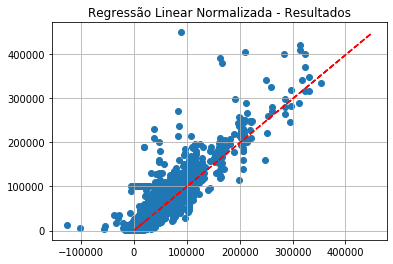

In [5]:
# modeling 

dataset = pd.read_csv("true_car_listings_clean.csv", header=0)
dataset = dataset.dropna()
dataset2 = dataset

y_dataset = dataset[['Price']]
#remove coluna price
dataset = dataset.loc[:, dataset.columns != 'Price']

dataset = pd.get_dummies(dataset, columns=["Region"])

X_train, X_test, y_train, y_test = train_test_split(dataset, y_dataset.values.ravel(), test_size=0.20,
                                                    random_state=None)

models = [LinearRegression()]
for model in models:
    dt = model
    print("Treinamento")
    print(dataset.shape)

    dt_scores = cross_val_score(dt.fit(X_train, y_train), X_train, y_train, cv=10, scoring="neg_mean_squared_error")
    dt_predict = dt.predict(X_test)
    print("Media cross validation score: {}".format(np.mean(dt_scores)))
    print("RMSE Score: ", sqrt(mean_squared_error(y_test, dt_predict)))
    print("MAE Score: ", mean_absolute_error(y_test, dt_predict))
    print("--------------------------------------------------")
    plt.scatter(dt_predict, y_test)
    plt.title('Regressão Linear Normalizada - Resultados')
    z = np.polyfit(dt_predict, y_test, 1)
    p = np.poly1d(z)
    plt.plot(y_test, p(y_test), "r--")
    plt.xlabel('Valores Encontrados')
    plt.ylabel('Valores Esperados')
    plt.grid(True)
    plt.show()


Treinamento
(852122, 119)
Media cross validation score: -88369830.04438734
RMSE Score:  9345.900153698878
MAE Score:  6319.759497098255
--------------------------------------------------


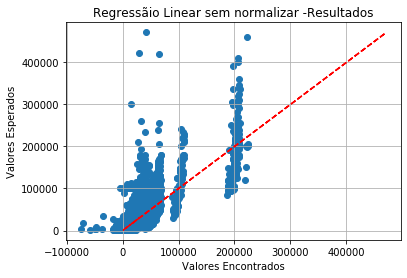

In [4]:
dataset = pd.read_csv("true_car_listings.csv", header=0)

y_dataset = dataset[['Price']]
dataset = dataset[["Year", "Mileage", "State", "Make"]]
dataset = pd.get_dummies(dataset, columns=["State", "Make"])

X_train, X_test, y_train, y_test = train_test_split(dataset, y_dataset.values.ravel(), test_size=0.20,
                                                    random_state=None)
warnings.filterwarnings("ignore", category=DeprecationWarning)

dt = reg = LinearRegression()

print("Treinamento")
print(dataset.shape)
dt_fit = dt.fit(X_train, y_train)

dt_scores = cross_val_score(dt_fit, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
dt_predict = dt.predict(X_test)
print("Media cross validation score: {}".format(np.mean(dt_scores)))
print("RMSE Score: ", sqrt(mean_squared_error(y_test, dt_predict)))
print("MAE Score: ", mean_absolute_error(y_test, dt_predict))
print("--------------------------------------------------")
plt.scatter(dt_predict, y_test)
z = np.polyfit(dt_predict, y_test, 1)
p = np.poly1d(z)
plt.title('Regressãio Linear sem normalizar -Resultados')
plt.plot(y_test, p(y_test), "r--")
plt.xlabel('Valores Encontrados')
plt.ylabel('Valores Esperados')
plt.grid(True)
plt.show()


Treinamento
(23249, 1)
Media cross validation score: -18936075.172618836
RMSE Score:  4143.819530926767
MAE Score:  3089.0401407394575
--------------------------------------------------


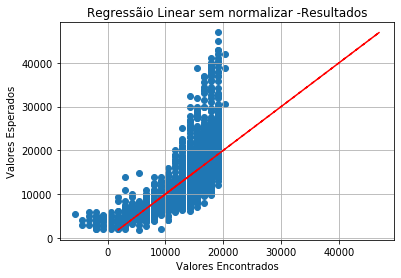

In [2]:
dataset = pd.read_csv("vw.csv", header=0)

y_dataset = dataset[['Price']]
# dataset = dataset[["Year", "Mileage", "State", "Make"]]
# dataset = pd.get_dummies(dataset, columns=["State", "Make"])
dataset = dataset[["Year"]]

X_train, X_test, y_train, y_test = train_test_split(dataset, y_dataset.values.ravel(), test_size=0.20,
                                                    random_state=None)
warnings.filterwarnings("ignore", category=DeprecationWarning)

dt = reg = LinearRegression()

print("Treinamento")
print(dataset.shape)
dt_fit = dt.fit(X_train, y_train)

dt_scores = cross_val_score(dt_fit, X_train, y_train, cv=10, scoring="neg_mean_squared_error")
dt_predict = dt.predict(X_test)
print("Media cross validation score: {}".format(np.mean(dt_scores)))
print("RMSE Score: ", sqrt(mean_squared_error(y_test, dt_predict)))
print("MAE Score: ", mean_absolute_error(y_test, dt_predict))
print("--------------------------------------------------")
plt.scatter(dt_predict, y_test)
z = np.polyfit(dt_predict, y_test, 1)
p = np.poly1d(z)
plt.title('Regressãio Linear sem normalizar -Resultados')
plt.plot(y_test, p(y_test), "r--")
plt.xlabel('Valores Encontrados')
plt.ylabel('Valores Esperados')
plt.grid(True)
plt.show()